# Interactive Configurator
Copyright (c) 2022 Siemens AG Oesterreich
SPDX-License-Identifier: MIT


In [1]:
%cd ..
import ooasp.settings as settings
settings.init('defined')
from ooasp.interactive import InteractiveConfigurator
from ooasp.kb import OOASPKnowledgeBase
racks_kb = OOASPKnowledgeBase.from_file("racks_v1","./examples/defined/racks/kb.lp")

/Users/susana/Education/Phd/ExternalProjects/OOASP/asp_interactive_configuration


------
## Basic interaction
------

### Start

In [2]:
iconf = InteractiveConfigurator(racks_kb,"racks_config_1",["./examples/defined/racks/constraints.lp"])

##### Help with all information

In [3]:
help(iconf)

Help on InteractiveConfigurator in module ooasp.interactive object:

class InteractiveConfigurator(builtins.object)
 |  InteractiveConfigurator(kb: ooasp.kb.OOASPKnowledgeBase, config_name: str, additional_files: List = None, additional_prg: str = '')
 |  
 |  Handles the interactive process of a configuration
 |      Properties:
 |          kb (OOASPKnowledgeBase): The Knowledge base
 |          config_name (str): The name of the configuration
 |          states (List[State]): The list of all states
 |          additional_files (List[str]): The list of additional lp files
 |          found_config (OOASPConfig):  The complete configuration found in the browsing
 |          brave_config (OOASPConfig):  The brave configuration found with all the options
 |          last_size_grounded (int): The last size that was grounded
 |  
 |  Methods defined here:
 |  
 |  __init__(self, kb: ooasp.kb.OOASPKnowledgeBase, config_name: str, additional_files: List = None, additional_prg: str = '')
 |   

### Visualize

In [4]:
iconf.show_history()

0. start


##### Knowledge Base

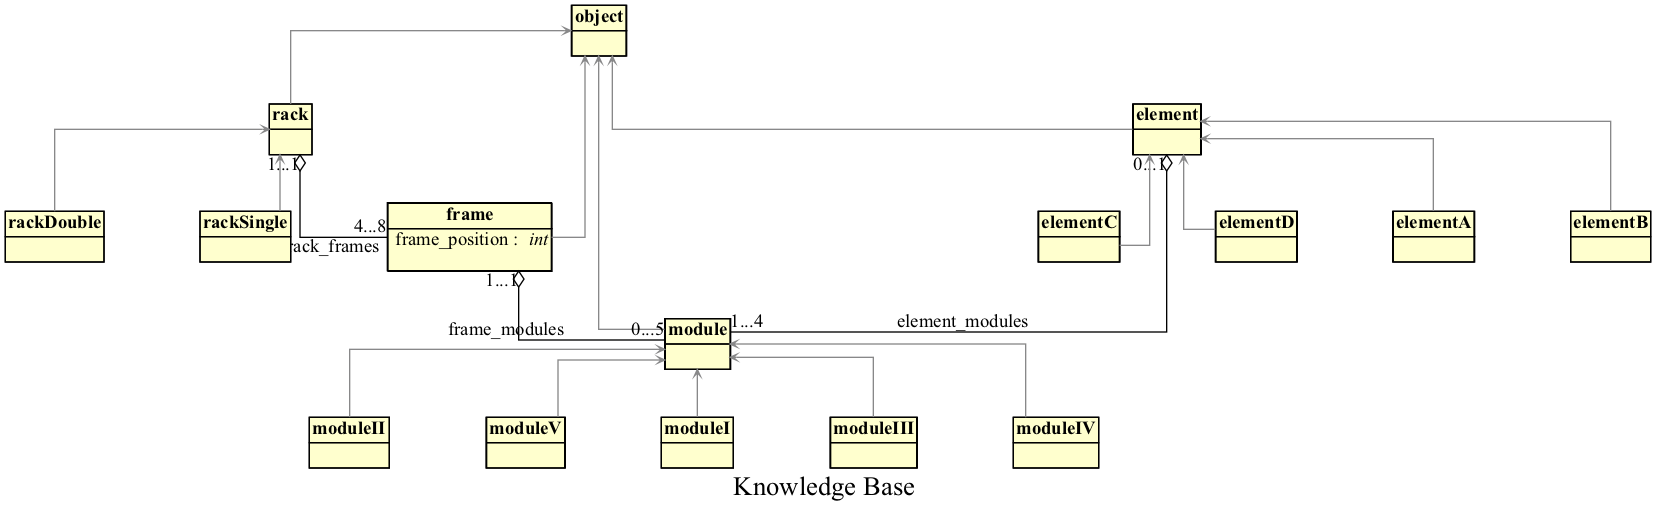

In [5]:
iconf.view_kb()

##### Current partial configuration

In [6]:
iconf.view()

##### State of the interaactive configurator

In [7]:
print(iconf)

==========INTERACTIVE CONFIG==========
{
    "kb": "racks_v1",
    "config": "racks_config_1",
    "browsing": false,
    "found configuration ": true
}
----------Current State----------
{
    "last action": "start",
    "number of objects": 0,
    "config": ""
}



### Check

In [8]:
iconf.check()
iconf.config.show_cv()

All checks passed!


------
## Extending the domain
------

### Extend the domain and propagate associations

In [6]:
iconf.extend_domain(1,'rackSingle',propagate=True)

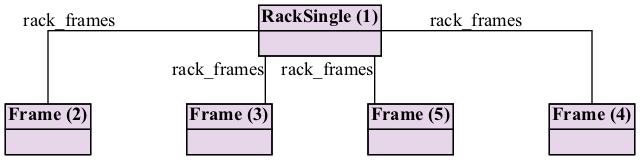

In [7]:
iconf.view()

In [10]:
iconf.extend_incrementally()

KeyboardInterrupt: 

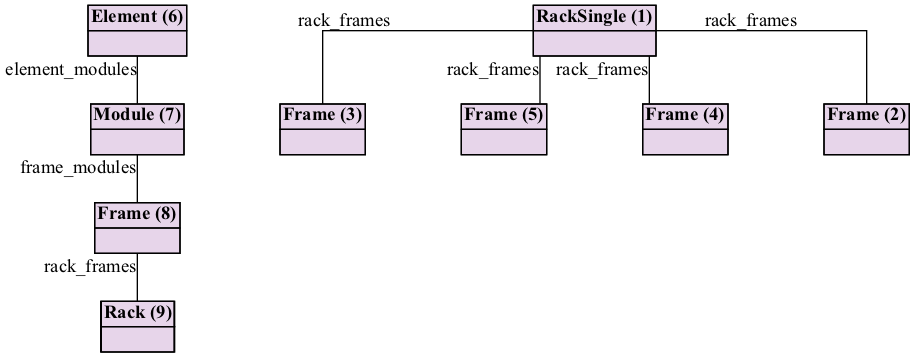

In [11]:
iconf.extend_domain(1,'element',propagate=True)
iconf.view()

### Extend the domain

In [14]:
iconf = InteractiveConfigurator(racks_kb,"racks_config_1",["./examples/defined/racks/constraints.lp"])

In [15]:
iconf.extend_domain(5)

### Add a leaf

In [18]:
iconf.new_leaf('frame')

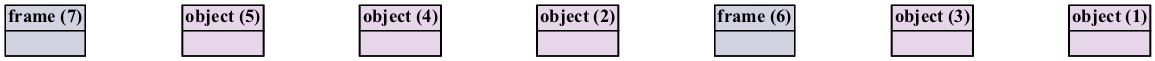

In [23]:
iconf.view()

In [20]:
iconf.show_options()


----------Options for object 1----------

select_leaf_class(1, 'frame')
select_leaf_class(1, 'moduleI')
select_leaf_class(1, 'moduleII')
select_leaf_class(1, 'moduleIII')
select_leaf_class(1, 'moduleIV')
select_leaf_class(1, 'moduleV')
select_leaf_class(1, 'elementA')
select_leaf_class(1, 'elementB')
select_leaf_class(1, 'elementC')
select_leaf_class(1, 'elementD')
select_leaf_class(1, 'rackSingle')
select_leaf_class(1, 'rackDouble')
select_value(1, 'frame_position', 1)
select_value(1, 'frame_position', 2)
select_value(1, 'frame_position', 3)
select_value(1, 'frame_position', 4)
select_value(1, 'frame_position', 5)
select_value(1, 'frame_position', 6)
select_value(1, 'frame_position', 7)
select_value(1, 'frame_position', 8)
select_association('rack_frames', 2, 1)
select_association('frame_modules', 1, 2)
select_association('element_modules', 1, 2)
select_association('rack_frames', 3, 1)
select_association('frame_modules', 1, 3)
select_association('element_modules', 1, 3)
select_associ

------
## Searching for solutions
------

### Browse solutions

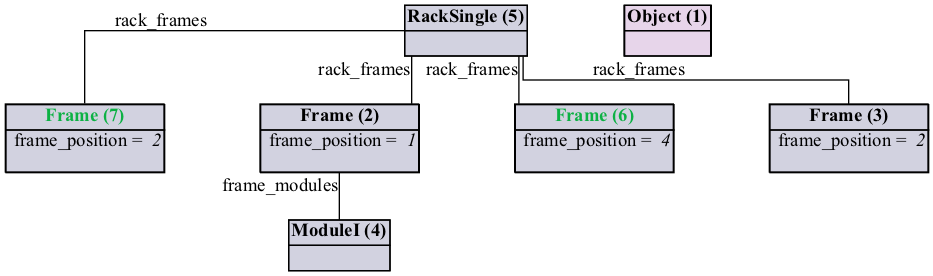

In [25]:
iconf.next_solution()
iconf.view_found()

### Extend incrementally

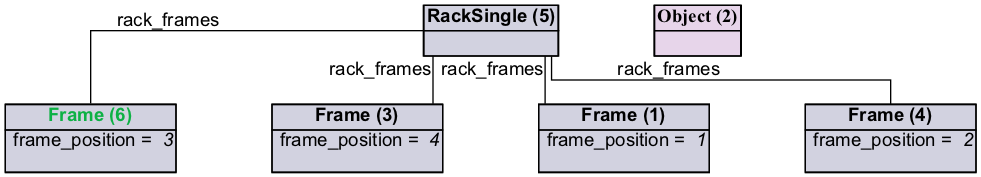

In [12]:
iconf.extend_incrementally()
iconf.view_found()

### Select found configuration

In [13]:
iconf.select_found_configuration()

### Show options for current configuration

In [15]:
# TODO: fix this
iconf.show_options()


----------Options for object 1----------

remove_leaf_class(1)
remove_value(1, 'frame_position')
remove_association('rack_frames', 5, 1)
select_association('frame_modules', 1, 2)
----------Options for object 2----------

select_leaf_class(2, 'frame')
select_leaf_class(2, 'moduleI')
select_leaf_class(2, 'moduleII')
select_leaf_class(2, 'moduleIII')
select_leaf_class(2, 'moduleIV')
select_leaf_class(2, 'moduleV')
select_leaf_class(2, 'elementA')
select_leaf_class(2, 'elementB')
select_leaf_class(2, 'elementC')
select_leaf_class(2, 'elementD')
select_leaf_class(2, 'rackSingle')
select_leaf_class(2, 'rackDouble')
select_value(2, 'frame_position', 1)
select_value(2, 'frame_position', 2)
select_value(2, 'frame_position', 3)
select_value(2, 'frame_position', 4)
select_association('frame_modules', 1, 2)
select_association('frame_modules', 3, 2)
select_association('frame_modules', 4, 2)
select_association('frame_modules', 6, 2)
----------Options for object 3----------

remove_leaf_class(3)
rem

------
## Modifing current (partial) configuration
------

### Select leaf class

In [14]:
iconf.select_leaf_class(1,'rackDouble')

### Select a value

In [15]:
iconf.select_value(1,'frame_position',1)

### Select Association

In [16]:
iconf.select_association('rack_frames',1,5)

### Remove leaf class

In [17]:
iconf.remove_leaf_class(1)

### Remove value

In [18]:
iconf.remove_value(4,'frame_position')

### Remove association

In [19]:
iconf.remove_association('rack_fames',1,2)